In [2]:
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
array = [i for i in range(1,11)]
for i in range(3):
    array.append(10)

In [ ]:
total_reward = defaultdict(int)
num_times_visited = defaultdict(int)
value_prediction = defaultdict(float)
for _ in range(1000000):
    episodes = []
    num_aces = 0
    dealer = random.choices(array,k=2)
    player = random.choices(array,k=2)
    dealer_total = dealer[0] + dealer[1]
    player_total = player[0] + player[1]
    if(player[0] == 1 or player[1] == 1):
        player_total += 10
        num_aces = 1
    episodes.append(player_total)
    while(player_total <= 19):
        next_card = random.choice(array)
        if next_card == 1:
            num_aces += 1
            player_total += 11
        else:
            player_total += next_card
        
        if(num_aces > 0 and player_total > 21):
            player_total -= 10
            num_aces -= 1
        episodes.append(player_total)
        player.append(next_card)
    if(player_total <= 21):
        while(dealer_total <= 16):
            dealer_total += random.choice(array)
        if(dealer_total > 21):
            reward = 1
        elif(dealer_total > player_total):
            reward = -1
        elif(dealer_total == player_total):
            reward = 0
        else:
            reward = 1
    else:
        reward = -1
    for i in range(len(episodes)-1, -1, -1):
        if 1 in player[0:i+2]:
            total_reward[(True, episodes[i], dealer[0])] += reward
            num_times_visited[(True, episodes[i], dealer[0])] += 1
            value_prediction[(True, episodes[i], dealer[0])] = total_reward[(True, episodes[i], dealer[0])] / num_times_visited[(True, episodes[i], dealer[0])]
        else:
            total_reward[(False, episodes[i], dealer[0])] += reward
            num_times_visited[(False, episodes[i], dealer[0])] += 1
            value_prediction[(False, episodes[i], dealer[0])] = total_reward[(False, episodes[i], dealer[0])] / num_times_visited[(False, episodes[i], dealer[0])]

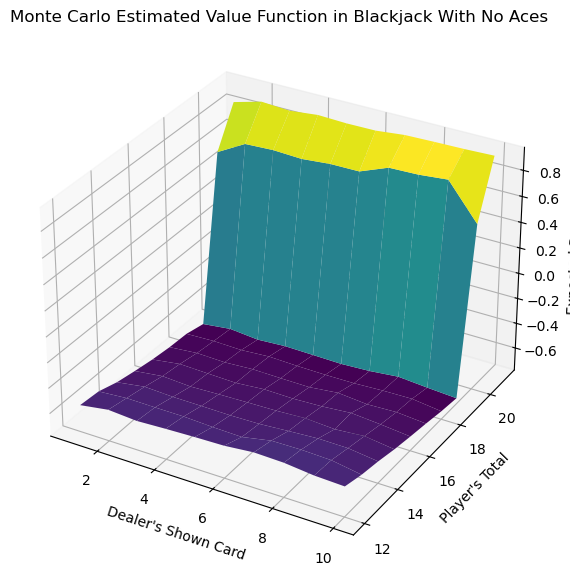

In [11]:

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

# Define ranges
player_pos = np.arange(12, 22)  # Player's total from 12 to 21
dealer_pos = np.arange(1, 11)   # Dealer's shown card (1 = Ace, 2-10)

# Create meshgrid for plotting
X, Y = np.meshgrid(dealer_pos, player_pos)

# Compute Z values (Expected Rewards)
Z = np.array([[value_prediction[(False, p, d)] for d in dealer_pos] for p in player_pos])

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor = None)
# Labels
ax.set_xlabel("Dealer's Shown Card")
ax.set_ylabel("Player's Total")
ax.set_zlabel("Expected Reward")
ax.set_title("Monte Carlo Estimated Value Function in Blackjack With No Aces")

plt.show()


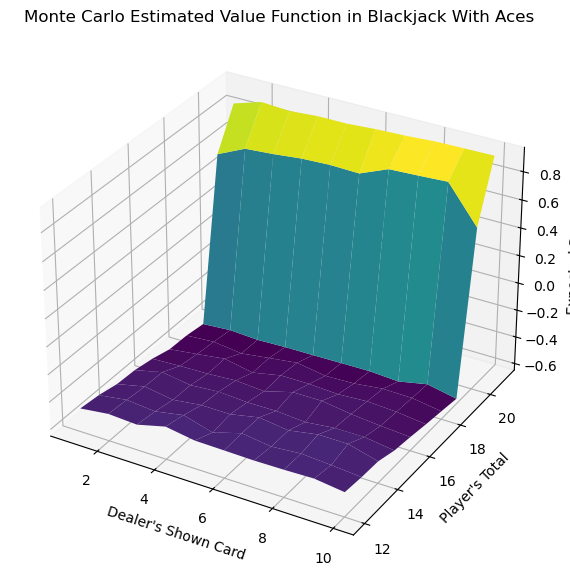

In [12]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

# Define ranges
player_pos = np.arange(12, 22)  # Player's total from 12 to 21
dealer_pos = np.arange(1, 11)   # Dealer's shown card (1 = Ace, 2-10)

# Create meshgrid for plotting
X, Y = np.meshgrid(dealer_pos, player_pos)

# Compute Z values (Expected Rewards)
Z = np.array([[value_prediction[(True, p, d)] for d in dealer_pos] for p in player_pos])

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor = None)
# Labels
ax.set_xlabel("Dealer's Shown Card")
ax.set_ylabel("Player's Total")
ax.set_zlabel("Expected Reward")
ax.set_title("Monte Carlo Estimated Value Function in Blackjack With Aces")

plt.show()

In [110]:
policy = defaultdict(lambda: random.choice([True,False]))
state_action_values = defaultdict(float)
total_rewards_from_state_action = defaultdict(float)
total_visits_to_state_action = defaultdict(int)

def calc_total_hand(array):
    total = sum(array)
    if 1 in array and total + 10 <= 21:
        total += 10
    return total

def usable_ace(array):
    return 1 in array and sum(array) + 10 <= 21

def test_policy(num_tests = 10_000):
    tot_reward = 0
    for _ in range(num_tests):
        dealer_cards = random.choices(array, k=2)
        player_cards = random.choices(array, k=2)
        player_total = calc_total_hand(player_cards)
        usable = usable_ace(player_cards)
        state = (usable, player_total, dealer_cards[0])
        
        # Follow the learned (greedy) policy.
        while player_total <= 21 and policy[state]:
            next_card = random.choice(array)
            player_cards.append(next_card)
            player_total = calc_total_hand(player_cards)
            usable = usable_ace(player_cards)
            state = (usable, player_total, dealer_cards[0])
        
        if player_total > 21:
            reward = -1
        else:
            dealer_total = calc_total_hand(dealer_cards)
            while dealer_total < 17:
                dealer_cards.append(random.choice(array))
                dealer_total = calc_total_hand(dealer_cards)
            if dealer_total > 21 or player_total > dealer_total:
                reward = 1
            elif dealer_total == player_total:
                reward = 0
            else:
                reward = -1
        tot_reward += reward
    return tot_reward / num_tests


loss1 = []
for asdf in range(1_000_000):
    episodes = []
    dealer_cards = random.choices(array, k = 2)
    player_cards = random.choices(array, k = 2)
    player_total = calc_total_hand(player_cards)
    ace = usable_ace(player_cards)
    a = random.choice([True, False])
    if a:
        episodes.append((ace, player_total, dealer_cards[0], True))
            
        player_cards.append(random.choice(array))
        player_total = calc_total_hand(player_cards)
        ace = usable_ace(player_cards)

        while player_total <= 21 and policy[(ace, player_total, dealer_cards[0])]:
            episodes.append((ace, player_total, dealer_cards[0], True))
            
            player_cards.append(random.choice(array))
            player_total = calc_total_hand(player_cards)
            ace = usable_ace(player_cards)

    if player_total <= 21:
        episodes.append((ace, player_total, dealer_cards[0], False))
        dealer_total = calc_total_hand(dealer_cards)

        while dealer_total < 17 and dealer_total < player_total:
            dealer_cards.append(random.choice(array))
            dealer_total = calc_total_hand(dealer_cards)
        
        if dealer_total > 21 or dealer_total < player_total:
            reward = 1
        elif dealer_total == player_total:
            reward = 0
        else:
            reward = -1
    else:
        reward = -1

    seen_state_actions = set()
    for state_action in episodes:
        if state_action not in seen_state_actions:
            seen_state_actions.add(state_action)
            total_rewards_from_state_action[(state_action)] += reward
            total_visits_to_state_action[(state_action)] += 1
            state_action_values[(state_action)] = total_rewards_from_state_action[(state_action)] / total_visits_to_state_action[(state_action)]
            if state_action_values[(state_action[0],state_action[1], state_action[2], True)] < state_action_values[(state_action[0],state_action[1], state_action[2], False)]:
                policy[(state_action[0],state_action[1], state_action[2])] = False
            else:
                policy[(state_action[0],state_action[1], state_action[2])] = True
    if asdf % 10000 == 0:
        loss1.append(test_policy())


In [87]:
tot_reward = 0
for _ in range(10000):
    num_aces = 0
    reward = -1
    dealer_cards = random.choices(array, k = 2)
    player_cards = random.choices(array, k = 2)
    player_total = sum(player_cards)
    if 1 in player_cards:
        num_aces += 1
        player_total += 10
    while player_total < 17:
            
        next_card = random.choice(array)
        if next_card == 1:
            player_total += 10
            num_aces += 1
        player_total += next_card

        if num_aces > 0 and player_total > 21:
            num_aces -= 1
            player_total -= 10

    if player_total <= 21:
        dealer_total = sum(dealer_cards)
        num_dealer_aces = 0
        if 1 in dealer_cards:
            num_dealer_aces += 1
            dealer_total += 10
        while dealer_total < 17 and dealer_total < player_total:
            next_card = random.choice(array)
            if next_card == 1:
                dealer_total += 10
                num_dealer_aces += 1
            dealer_total += next_card

            if num_dealer_aces > 0 and dealer_total > 21:
                num_dealer_aces -= 1
                dealer_total -= 10
        if dealer_total > 21 or dealer_total < player_total:
            reward = 1
        elif dealer_total == player_total:
            reward = 0
    tot_reward += reward
baseline = tot_reward/10000
print(baseline)

-0.0984


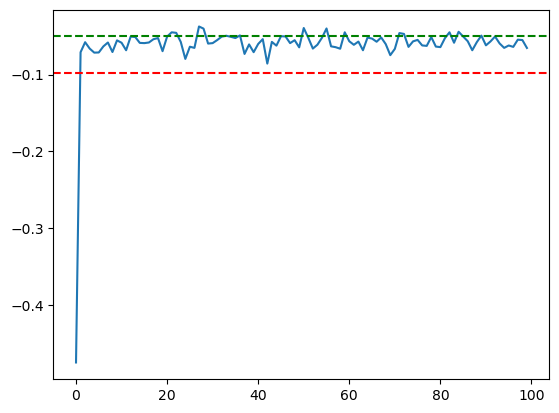

In [106]:
plt.plot(loss1)
plt.axhline(y=-0.05, color='g', linestyle='--')#expected optimal reward
plt.axhline(y=baseline, color='r', linestyle='--')#Naive solution, copying dealer's strategy

In [111]:
player_pos = np.arange(12, 22)  # Player's total from 12 to 21
dealer_pos = np.arange(1, 11)   # Dealer's shown card (1 = Ace, 2-10)
for p in player_pos:
    for d in dealer_pos:
        if policy[(True, p, d)]:
            print("H", end=" ")
        else:
            print("S", end=" ")
    print()

H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H S S S S S S S H H 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 


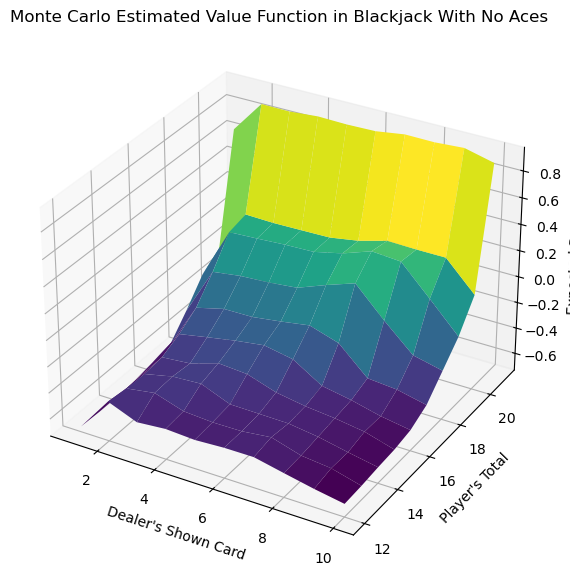

In [89]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

# Define ranges
player_pos = np.arange(12, 22)  # Player's total from 12 to 21
dealer_pos = np.arange(1, 11)   # Dealer's shown card (1 = Ace, 2-10)

# Create meshgrid for plotting
X, Y = np.meshgrid(dealer_pos, player_pos)

# Compute Z values (Expected Rewards)
Z = np.array([[(total_rewards_from_state_action[(False, p, d, True)] + total_rewards_from_state_action[(False, p, d, False)]) / (total_visits_to_state_action[(False,p,d,True)] + total_visits_to_state_action[(False,p,d,False)]) for d in dealer_pos] for p in player_pos])

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor = None)
# Labels
ax.set_xlabel("Dealer's Shown Card")
ax.set_ylabel("Player's Total")
ax.set_zlabel("Expected Reward")
ax.set_title("Monte Carlo Estimated Value Function in Blackjack With No Aces")

plt.show()

In [165]:
estimate = []
weighted_reward = 0
total_weight_sum = 0
for _ in range(10_000):
    dealer_cards = [2, random.choice(array)]
    player_total = 13
    ace = True
    weight = 1
    while True:
        target_action = player_total < 20
        behavior_action = random.choice([True, False])
        if behavior_action != target_action:
            weight = 0
            break
        weight *= 2
        if not behavior_action:
            break
        
        next_card = random.choice(array)
        if next_card == 1 and not ace:
            player_total += 10
            ace = True
        player_total += next_card

        if ace and player_total > 21:
            player_total -= 10
            ace = False

        if player_total > 21:
            break

    
    if weight == 0:
        continue

    if player_total <= 21:
        episodes.append((ace, player_total, dealer_cards[0], False))
        dealer_total = calc_total_hand(dealer_cards)

        while dealer_total < 17 and dealer_total < player_total:
            dealer_cards.append(random.choice(array))
            dealer_total = calc_total_hand(dealer_cards)
        
        if dealer_total > 21 or dealer_total < player_total:
            reward = 1
        elif dealer_total == player_total:
            reward = 0
        else:
            reward = -1
    else:
        reward = -1

    weighted_reward += weight * reward
    total_weight_sum += weight
    estimate.append(weighted_reward / total_weight_sum if total_weight_sum != 0 else 0)

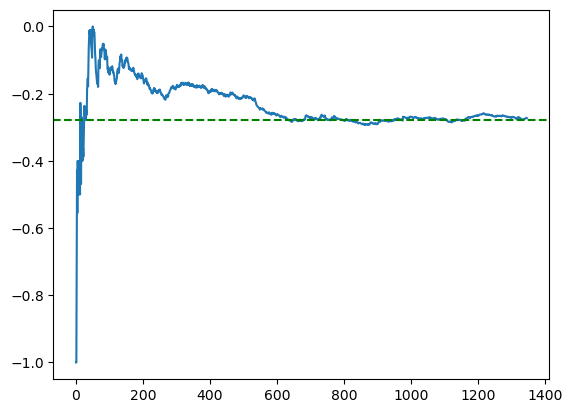

In [166]:
plt.plot(estimate)
plt.axhline(y=-0.27726, color='g', linestyle='--')#expected value for given state